# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [131]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [133]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [134]:
# write your code here
df.shape

(1898, 9)

#### Observations:
* The dataset has 1,898 rows and 9 columns.

### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [135]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* All columns have 1,898 observations idicating that there are no missing values in the dataset. 
* restaurant_name, cuisine_type and day_of_the_week are read as 'object' but they should have type 'category'.  



### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [136]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data

df['restaurant_name'] = df.restaurant_name.astype('category')
df['cuisine_type'] = df.cuisine_type.astype('category')
df['day_of_the_week'] = df.day_of_the_week.astype('category')


# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
* There are 5 numberic columns, 3 categorical columns and 1 object column. 

### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [144]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
* The mean and the median of the food preparation times are very close in value indicating the distribution may be symmetric.
* The mean cost of a order is slightly larger than the median of the cost indicating a possible slight right (positive) skew. 
* There isn't a large range in the times it takes to prepare the food and deliver the food, when looked at individually. 



### **Question 5:** How many orders are not rated? (0.5 mark)

In [138]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
* There are 736 orders that are not rated. 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

## Numerical Variables

In [10]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

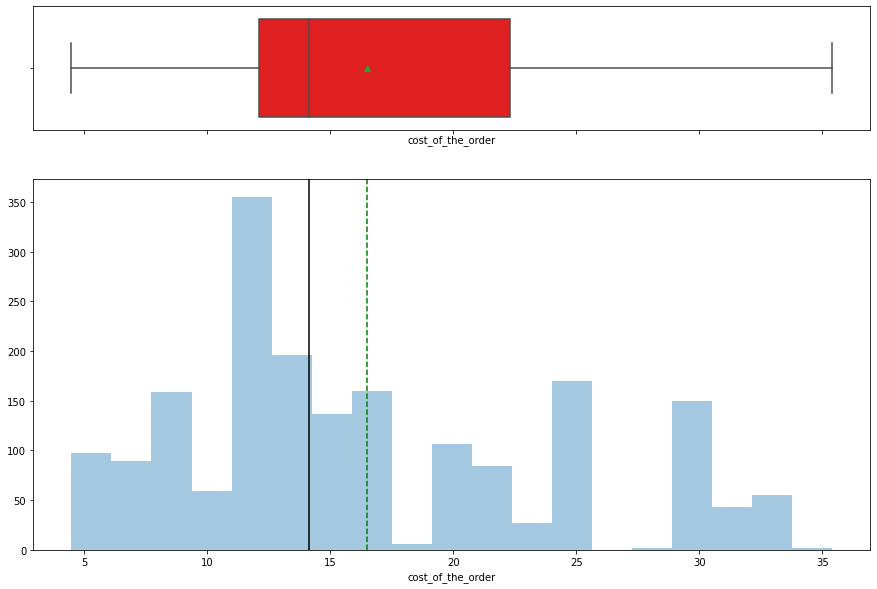

In [11]:
histogram_boxplot(df.cost_of_the_order)

#### Observations
* There are no outliers in the distribution of the cost of the order. 
* The distribution of the cost has a slight positive skew. 
* The price with the most observations is ~$12.
* The orders in the higher end of the price range have more variability than the orders in the lower price range. 

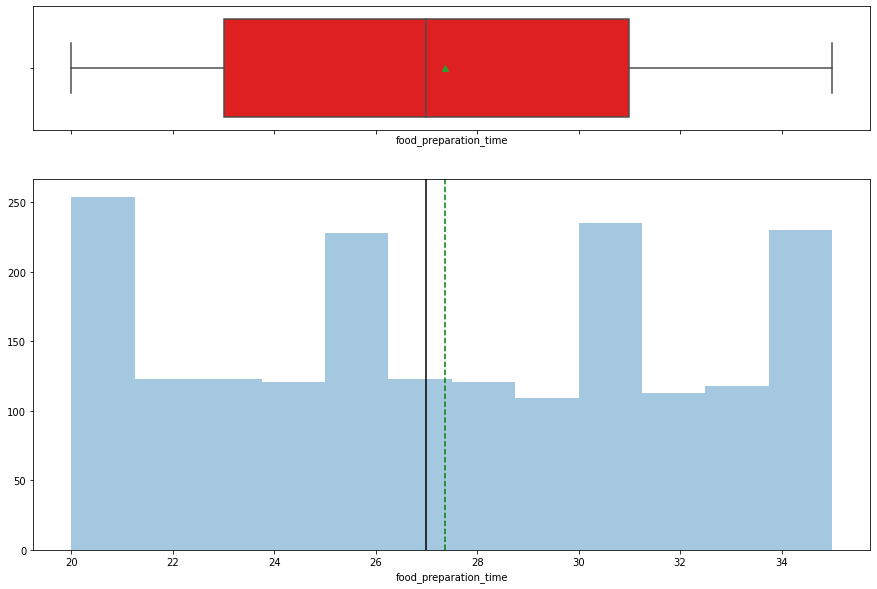

In [12]:
histogram_boxplot(df.food_preparation_time)

#### Observations
* The food preparation time does not have any outliers. 
* The distribution of the food preparation time is fairly symmetric with 4 peaks around 20, 26, 31 and 34 minutes. 
* The mean and the median are both in the center of the distribution around 27 minutes. 


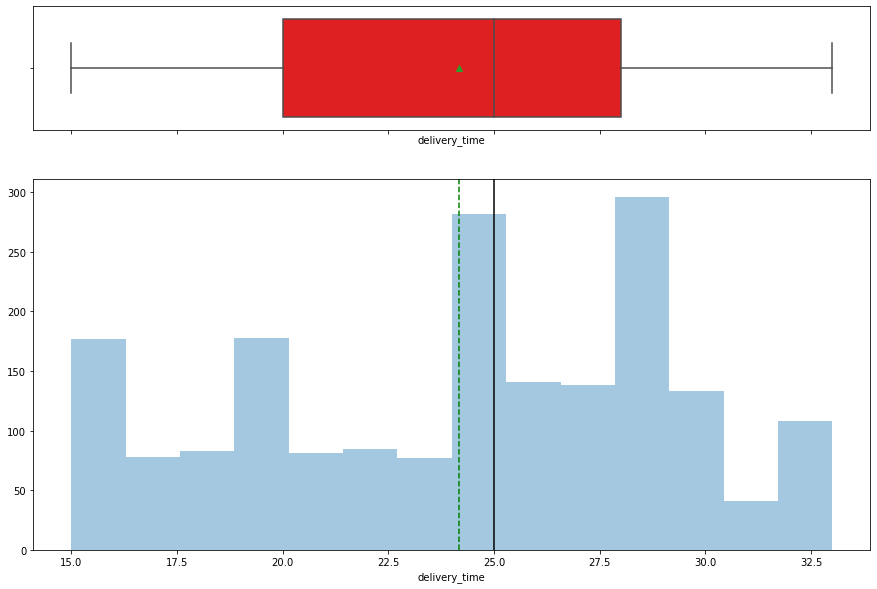

In [13]:
histogram_boxplot(df.delivery_time)

#### Observations
* The food delivery time does not have any outliers. 
* The mean and the median of the distribution of the delivery times are close in value. The mean delivery time (~ 24 mins) is less than the median delivery time (~ 25 mins).
* There is less variability on delivery times in the upper 50 percentile. 

## Categorical Data

In [14]:
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

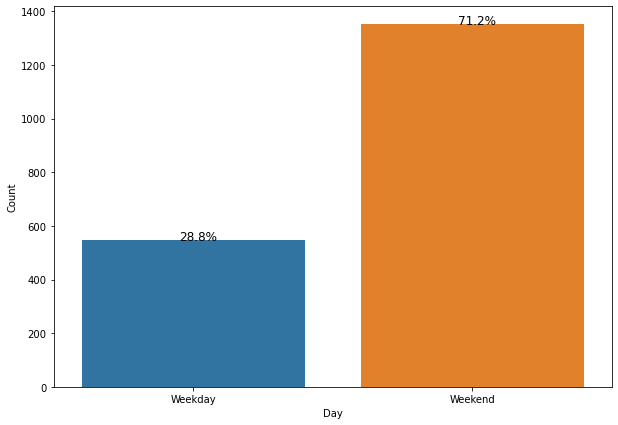

In [15]:
plt.figure(figsize=(10,7))

ax = sns.countplot(df['day_of_the_week'])

plt.xlabel('Day')
plt.ylabel('Count')



bar_perc(ax,df['day_of_the_week'])

#### Observations
* 71.2% of orders are placed on the weekend. 

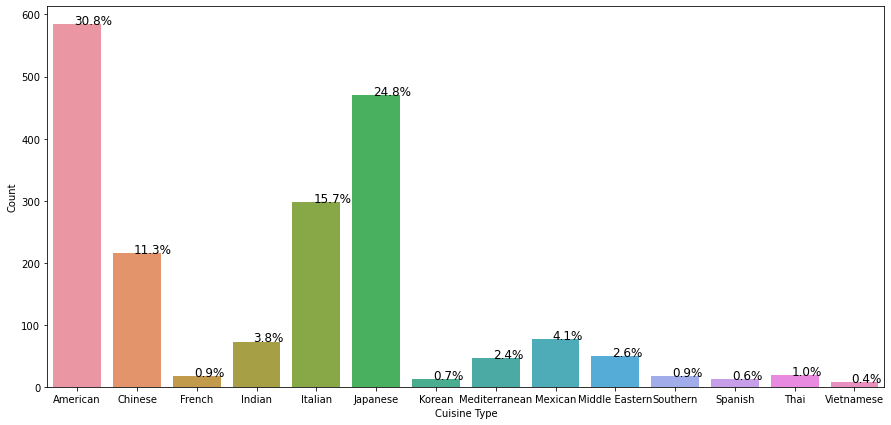

In [16]:
plt.figure(figsize=(15,7))

ax = sns.countplot(df['cuisine_type'])

plt.xlabel('Cuisine Type')
plt.ylabel('Count')



bar_perc(ax,df['cuisine_type'])

#### Observations
* American and Japanese cuisine account for over half of the orders. 

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [142]:
# write the code here
top = df.restaurant_name.value_counts()
top.head(30)

Shake Shack                              219
The Meatball Shop                        132
Blue Ribbon Sushi                        119
Blue Ribbon Fried Chicken                 96
Parm                                      68
RedFarm Broadway                          59
RedFarm Hudson                            55
TAO                                       49
Han Dynasty                               46
Blue Ribbon Sushi Bar & Grill             44
Nobu Next Door                            42
Rubirosa                                  37
Sushi of Gari 46                          37
Momoya                                    30
Blue Ribbon Sushi Izakaya                 29
Five Guys Burgers and Fries               29
Bareburger                                27
Tamarind TriBeCa                          27
Jack's Wife Freda                         25
Sushi of Gari Tribeca                     24
Chipotle Mexican Grill $1.99 Delivery     23
Cafe Mogador                              18
The Smile 

#### Observations:
* The 5 restaurants with the highest number of orders are "Shake Shack", "The Meatball Shop", "Blue Ribbon Sushi", "Blue Ribbon Fried Chicken" and "Parm". 

### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [104]:
df.groupby(by = 'day_of_the_week')['cuisine_type'].describe()

,count,unique,top,freq
day_of_the_week,,,,
Weekday,547,14,American,169
Weekend,1351,14,American,415


#### Observations:
* American was the most popular cuisine on the weekend. 

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [19]:
# write the code here
cost = df[df['cost_of_the_order'] > 20]

cost

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22
...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17


In [20]:
555/1898*100

29.24130663856691

#### Observations:


* 29% of the oders placed cost more than $20. 

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [21]:
# write the code here
df.delivery_time.mean()

24.161749209694417

#### Observations:
* It takes 24.16 minutes on average to deliver an order. 

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [22]:
df.sort_values(by='cost_of_the_order',ascending=False)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29
1646,1477665,231061,Han Dynasty,Chinese,34.19,Weekday,Not given,21,31
1762,1477700,60039,Blue Ribbon Sushi,Japanese,33.37,Weekday,3,30,27
1831,1476970,275689,Nobu Next Door,Japanese,33.37,Weekend,4,32,21
1370,1478329,116992,Tres Carnes,Mexican,33.32,Weekday,4,21,33
...,...,...,...,...,...,...,...,...,...
82,1477790,133617,Shake Shack,American,4.75,Weekday,4,35,28
1569,1477786,145389,RedFarm Hudson,Chinese,4.75,Weekend,3,23,25
542,1477788,270444,P.J. Clarke's,American,4.71,Weekend,Not given,23,15
480,1476877,53289,The Loop,Japanese,4.66,Weekend,Not given,34,25


#### Observations:
* The customer that will recieve the $15 dollar coupon is customer #62359 who placed on order on a weekday at "Pylos", a Mediterranean restuarant.

### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

In [ ]:
dropped = df[~df['rating'].isin(['Not given'])]

dropped['rating'] = dropped.rating.astype('int64')

dropped.info()

<AxesSubplot:>

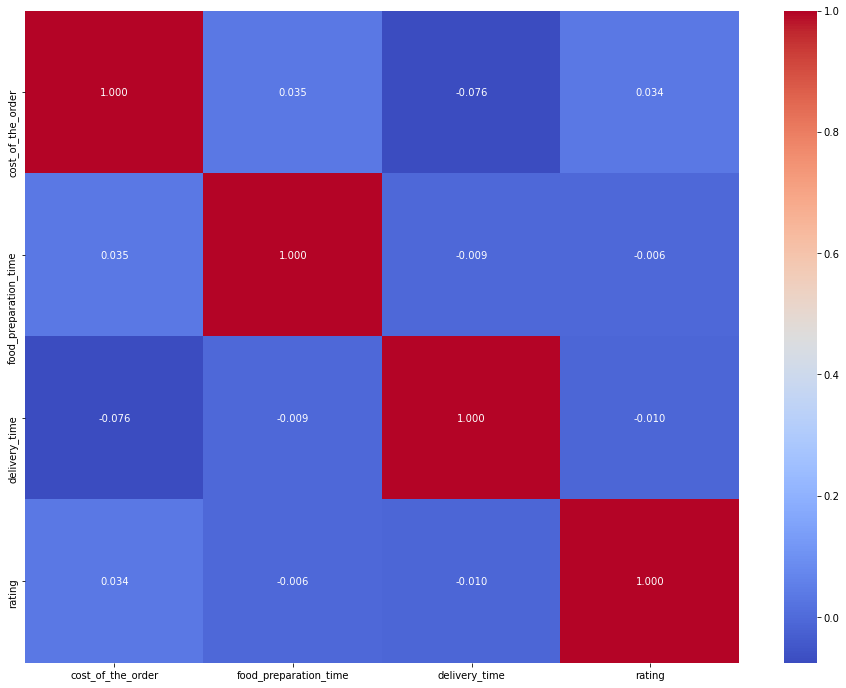

In [153]:

num_var = ['cost_of_the_order','food_preparation_time','delivery_time','rating']

corr = dropped[num_var].corr()


plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True,cmap='coolwarm',
        fmt=".3f",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

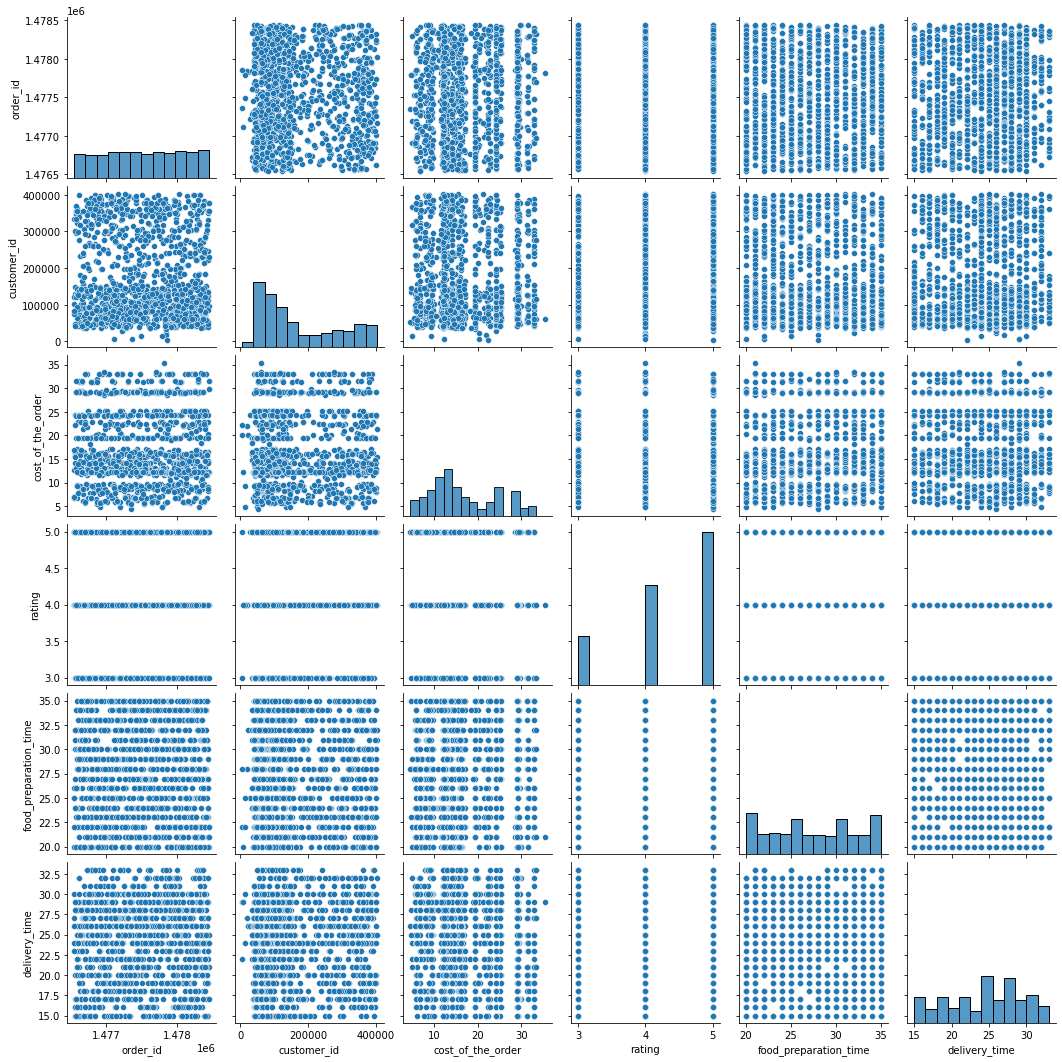

In [154]:
sns.pairplot(dropped)


#### Observations
* There does no appear to be any strong relationship between the cost of the order, the food preparation time, the delivery time or rating.

<AxesSubplot:xlabel='cost_of_the_order', ylabel='cuisine_type'>

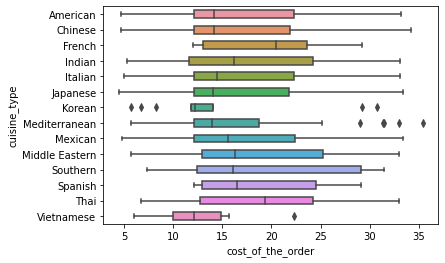

In [181]:
sns.boxplot(x="cost_of_the_order", y="cuisine_type", width = .5, data=df)

#### Observations
* All the cuisine types, with the exception of French, have a median order price of less than $20.

<AxesSubplot:xlabel='delivery_time', ylabel='rating'>

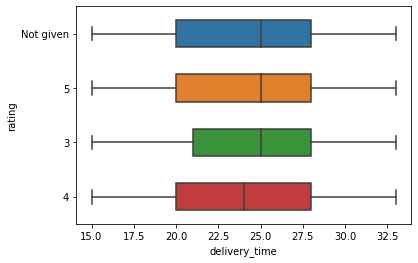

In [182]:
sns.boxplot(x="delivery_time", y="rating", width = .5, data=df)

<AxesSubplot:xlabel='food_preparation_time', ylabel='rating'>

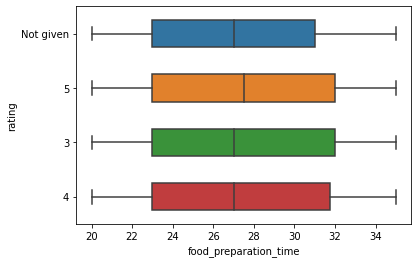

In [183]:
sns.boxplot(x="food_preparation_time", y="rating", width = .5, data=df)

#### Observation
* Food preparation time and delivery time do not appear to have an impact on customer rating. 

<AxesSubplot:xlabel='cost_of_the_order', ylabel='day_of_the_week'>

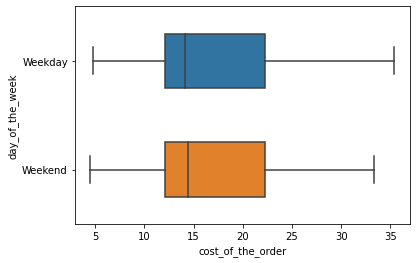

In [190]:
sns.boxplot(x="cost_of_the_order", y='day_of_the_week' , width = .5, data=df)

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [171]:
dropped.groupby(['restaurant_name'])['rating'].count()

restaurant_name
'wichcraft           1
12 Chairs            2
5 Napkin Burger      2
67 Burger            1
Alidoro              0
                    ..
Zero Otto Nove       1
brgr                 1
da Umberto           1
ilili Restaurant    13
indikitch            2
Name: rating, Length: 178, dtype: int64

In [172]:
rating_count = dropped.groupby(['restaurant_name'])['rating'].count().reset_index(name='number_of_ratings')

rating_count.sort_values(by='number_of_ratings', ascending = False)

,restaurant_name,number_of_ratings
136,Shake Shack,133
153,The Meatball Shop,84
21,Blue Ribbon Sushi,73
20,Blue Ribbon Fried Chicken,64
121,RedFarm Broadway,41
...,...,...
96,Market Table,0
110,Paul & Jimmy's,0
124,Room Service,0
123,Rohm Thai,0


In [165]:
restaurant_50 = rating_count[rating_count['number_of_ratings']>50]['restaurant_name'].reset_index()
restaurant_50

,index,restaurant_name
0,20,Blue Ribbon Fried Chicken
1,21,Blue Ribbon Sushi
2,136,Shake Shack
3,153,The Meatball Shop


In [167]:
avg_rating = dropped.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index(name='Avg_Rating')
avg_rating

,restaurant_name,Avg_Rating
0,'wichcraft,5.0
1,Ravagh Persian Grill,5.0
2,Chola Eclectic Indian Cuisine,5.0
3,Chote Nawab,5.0
4,Junoon,5.0
...,...,...
173,Rohm Thai,NaN
174,Room Service,NaN
175,Spice Thai,NaN
176,Tarallucci e Vino Restaurant,NaN


In [168]:
rating_4 = avg_rating[avg_rating['Avg_Rating']>4]['restaurant_name'].reset_index()
rating_4

,index,restaurant_name
0,0,'wichcraft
1,1,Ravagh Persian Grill
2,2,Chola Eclectic Indian Cuisine
3,3,Chote Nawab
4,4,Junoon
...,...,...
105,105,Cafe Mogador
106,106,ilili Restaurant
107,107,Parm
108,108,Rubirosa


In [170]:
promo = avg_rating[avg_rating['restaurant_name'].isin(restaurant_50)]
promo

,restaurant_name,Avg_Rating


#### Observations:
 * The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack and Blue Ribbon Sushi will meet the criteria to get the promotional offer.  

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [54]:
G20 = df[df.cost_of_the_order > 20]
GL5 = df[(df.cost_of_the_order < 20) & (df.cost_of_the_order >5) ]

In [55]:
.25*G20['cost_of_the_order'].sum() + .15*GL5['cost_of_the_order'].sum()

6166.303

#### Observations:
* If the company charges 25 % on all orders over $ 20 and 15 % on all orders over $ 5, they will generate a net revenue of $6,166.30. 

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [56]:
df['total_delivery']= df['food_preparation_time']+df['delivery_time']
D60 = df[df.total_delivery>60]
D60

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,63
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28,62
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,61
24,1476714,363783,Cafe Mogador,Middle Eastern,15.86,Weekday,Not given,32,29,61
54,1477760,130507,Jack's Wife Freda,Mediterranean,22.75,Weekend,3,35,29,64
...,...,...,...,...,...,...,...,...,...,...
1869,1476923,50199,J. G. Melon,American,19.40,Weekday,4,35,26,61
1873,1478148,261371,Shake Shack,American,22.31,Weekend,Not given,35,28,63
1875,1478039,292343,Amy Ruth's,Southern,12.23,Weekday,Not given,32,33,65
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27,62


In [57]:
df.shape

(1898, 10)

In [58]:
200/1898

0.1053740779768177

#### Observations:
* 10.5 % of all orders take longer than 60 minutes to deliver (food preperation time and delivery time). 

### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [59]:
df.groupby('day_of_the_week').delivery_time.mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

In [60]:
28.34-22.47

5.870000000000001

#### Observations:
* The mean delivery time on the weekday is greater than the mean delivery time on the weekend by approximately 5.87 minutes. 

### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (5 marks)

#### Insights:
We analyzed the data from 1,898 Food Hub food orders made from an online portal. We looked the demand by restaurant, weekday and cuisine type. We also analyzed delivery time in terms of food preparation time, delivery time (restaurant to customer) and total delivery time (food preparation time combined with delivery time). Customer ratings were also analyzed.
We have been able to conclude:
1. Almost 40 % of orders go unrated by customers.
2. The majority of the orders are under $ 15.
3. Food preparation time and delivery time have ranges of around 12 minutes
4. The majority of the orders are placed on the weekend.
5. American and Japanese food account for more than 50% of the cuisine type.
6. There doesn't seem to be an association between the food preparation time, food delivery time and cost of the order.
7. Delivery time, food preparation time and cost of the order do not seem to have an impact on the rating of an order.

 

#### Recommendations to business

1. The majority of ratings are from satisfied customers and a large percentage of orders go unrated. For improved analysis of a customers experience, an increase in the participation in rating orders will offer more insight. 
2. The weekends have over 50% more orders than the weekday. Provide customers with more incentive to order through Food Hub portal during the week. 
3. American and Japanese food are the most ordered cuisine type. Promotion and increased business from American and Japanese restaurants can generate more orders. 
4. Expand the proposed promotion to include more restaurants.  
5. Food appears to be prepared and delivered at a reasonable and consistent time, regardless of order price, this information is good for business and can be used to promote the use of the service. 
6. Since the majority of the orders are under $15 dollars, a slight increase in the charged on those orders will increase revenue. 